In [1]:
import glob
import sys
import os
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
from functools import partial
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def data_load():
    files = glob.glob('./data/*')
    if not files:
        print("Chck Phath")
        sys.exit()
    else:
        files.remove(r'./data\raw_data')

    _feature=[]
    label=[]
    for address in files:
        label_ = os.path.basename(address)
        for num in glob.glob(address+'/*'):
            _feature.append(np.load(num))
            label.append([label_]*len(np.load(num)))
        print(label_)
    switch = 0
    for i in _feature:
        if switch == 0:
            feature = np.array(i)
            switch = 1+ switch
        else:
            feature = np.vstack((feature, i))

    target = np.array(label).flatten()
    return feature, target.reshape((-1,))

features, label = data_load()
encoder = LabelEncoder()
target = encoder.fit_transform(label)


X_train,  X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.15, random_state=0)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
number_of_classes = y_valid.shape[1]

fracture
mechanic
science
strain
stress


Train on 425 samples, validate on 75 samples
Epoch 1/100
425/425 [==============================] - 4s 10ms/sample - loss: 2.0629 - accuracy: 0.2259 - val_loss: 1.6123 - val_accuracy: 0.1867

(0.0, 0.1)

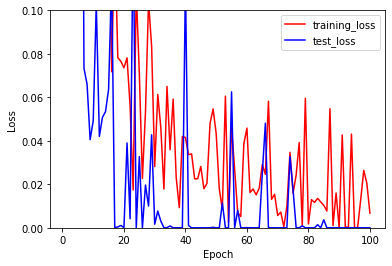

In [6]:
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[270, 270, 5]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=number_of_classes, activation="softmax"),
])

model.compile(loss="categorical_crossentropy", optimizer='RMSProp', metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
score = model.evaluate(X_valid, y_valid)

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1, len(training_loss)+1)

training_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.plot(epoch_count, training_loss, "r-")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["training_loss", "test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0,0.1)

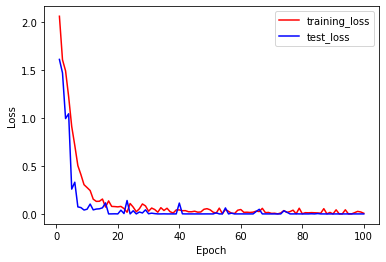

In [9]:
plt.plot(epoch_count, training_loss, "r-")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["training_loss", "test_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig('./figure/loss.png',dpi=300,bbox_inches='tight')

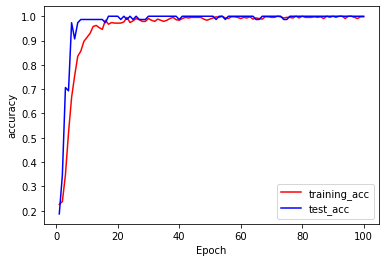

In [10]:
plt.plot(epoch_count, training_acc, "r-")
plt.plot(epoch_count, test_acc, "b-")
plt.legend(["training_acc", "test_acc"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.savefig('./figure/acc.png',dpi=300,bbox_inches='tight')

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 270, 270, 64)      2944      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 135, 135, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 135, 135, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 135, 135, 128)     147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 67, 67, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 67, 67, 256)       295168    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 67, 67, 256)      

In [12]:
features.shape

(500, 270, 270, 5)